### Engineering Colleges Case Study

### Context
Education is fast becoming a very competitive sector with hundreds of institutions to choose from. It is a life-transforming experience for any student and it has to be a thoughtful decision. There are ranking agencies that do a survey of all the colleges to provide more insights to students. Agency RankForYou wants to leverage this year's survey to roll out an editorial article in leading newspapers, on the state of engineering education in the country. Head of PR (Public Relations) comes to you, the data scientist working at RankForYou, and asks you to come up with evidence-based insights for that article.

### Objective
To identify different types of engineering colleges in the country to better understand the state of affairs.

### Key Questions
- How many different types (clusters/segments) of colleges can be found from the data?
- How do these different groups of colleges differ from each other?

### Data Description
The data contains survey results for 26 engineering colleges. The initial survey data has been summarized into a rating scale of 1-5 for different factors.

Factor rating index

1 - Very low
2 - Low
3 - Medium
4 - High
5 - Very high
Data Dictionary

SR_NO: Serial Number
Engg_College: 26 Engineering colleges with pseudonyms A to Z
Teaching: Quality of teaching at the engineering college
Fees: Fees at the engineering college
Placements: Job placements after a student graduates from the engineering college
Infrastructure: Infrastructure of the engineering college

In [1]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Engineering_Colleges_Case_Study.csv')
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Infrastructure
0,1,A,5,2,5,3
1,2,B,4,2,5,3
2,3,C,4,5,5,5
3,4,D,5,4,5,4
4,5,E,2,5,2,5


In [17]:
df.shape

(26, 6)

In [18]:
df.drop(['SR_NO'], inplace=True, axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Engg_College    26 non-null     object
 1   Teaching        26 non-null     int64 
 2   Fees            26 non-null     int64 
 3   Placements      26 non-null     int64 
 4   Infrastructure  26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [20]:
df.describe()

,Teaching,Fees,Placements,Infrastructure
count,26.000000,26.000000,26.000000,26.000000
mean,2.807692,3.576923,2.884615,3.384615
std,1.132051,1.331858,1.531716,1.298520
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.250000,1.250000,3.000000
50%,3.000000,4.000000,3.000000,3.000000
75%,3.000000,5.000000,4.000000,4.750000
max,5.000000,5.000000,5.000000,5.000000


In [21]:
df.isnull().sum()

Engg_College      0
Teaching          0
Fees              0
Placements        0
Infrastructure    0
dtype: int64

In [22]:
df.isna().sum()

Engg_College      0
Teaching          0
Fees              0
Placements        0
Infrastructure    0
dtype: int64

### K-Means Clustering

In [23]:
df_sub = df.drop("Engg_College", axis=1)

In [24]:
df_sub.columns

Index(['Teaching', 'Fees', 'Placements', 'Infrastructure'], dtype='object')

Number of clusters:  1 	 Average Distortion: 2.445161236901436
Number of clusters:  2 	 Average Distortion: 1.8386954425352884
Number of clusters:  3 	 Average Distortion: 1.5663251587239047
Number of clusters:  4 	 Average Distortion: 1.3622241352110023
Number of clusters:  5 	 Average Distortion: 1.1702052828266019
Number of clusters:  6 	 Average Distortion: 1.0227348535373915
Number of clusters:  7 	 Average Distortion: 0.8898446858367483
Number of clusters:  8 	 Average Distortion: 0.7536430520826071


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

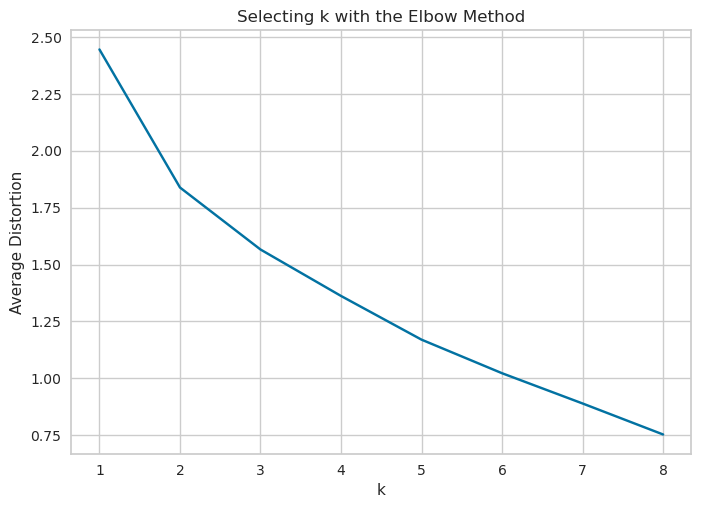

In [26]:
clusters = range(1,9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_sub)
    prediction = model.predict(df_sub)
    distortion = (
        sum(np.min(cdist(df_sub, model.cluster_centers_, "euclidean"), axis=1))/ df_sub.shape[0]
    )
    meanDistortions.append(distortion)
    print("Number of clusters: ", k, "\t Average Distortion:", distortion)
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method")

In the above plot, the elbow is seen for K=2 and 4 but if you observe the Average distortion results, there is some drop in distortion at K= 5

### Q) How do we determine the optimal K value when the elbows are observed at 3 or more K values from the elbow curve?

- To make a better decision about the number of clusters, we can look at the silhouette score for different K values.


### What is silhouette score?
Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

- Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
- Silhouette score near -1 indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2, silhouette score is 0.38121701144257797
For n_clusters = 3, silhouette score is 0.4288415910208104
For n_clusters = 4, silhouette score is 0.36154656907517135
For n_clusters = 5, silhouette score is 0.3768337560059902
For n_clusters = 6, silhouette score is 0.3792762157171464
For n_clusters = 7, silhouette score is 0.4075043503151385
For n_clusters = 8, silhouette score is 0.45545926155854705
For n_clusters = 9, silhouette score is 0.43455545456455663


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

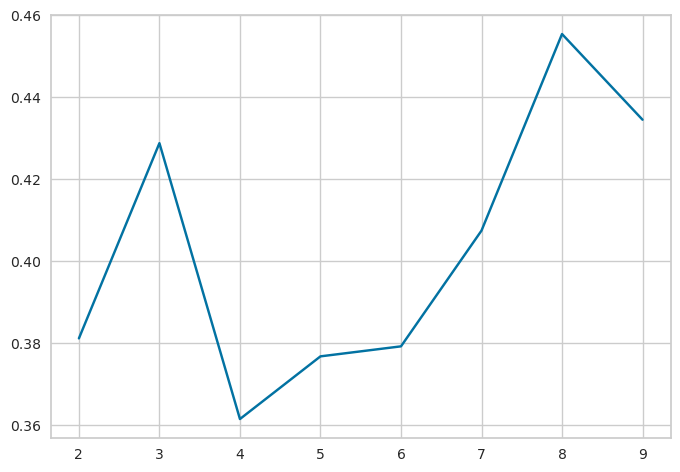

In [28]:
sil_score = []
cluster_list = list(range(2,10))
#print(cluster_list)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_sub)
    score = silhouette_score(df_sub, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}". format(n_clusters, score))
    
plt.plot(cluster_list, sil_score)

From the silhouette scores, it seems that 7 is a good value of k.Let's do deeper investigation for different K values using SilhouetteVisualizer

### How to interpret the results of SilhouetteVisualizer?
Below are the points that every cluster needs to satisfy for selecting the optimal K-value.

There should be no negative silhouette coefficent value
- All the clusters should cross the avg silhouette score
- All the clusters should have the different variations (width)
- All the clusters should have different silhouette score
Note

Width of each cluster refers to the size of each cluster. (Number of data points present in each cluster)
Horizontal line refers to the Silhouette score of each cluster.
Dotted red line is an Average Silhouette score.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

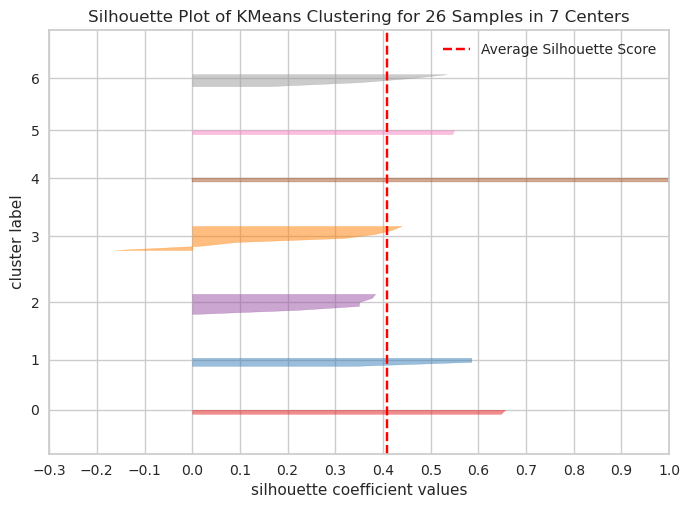

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 26 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(df_sub)
visualizer.show()

#### From the above plot, we can see that cluster with label 2 silhoutte score is not more than Average silhouette score , so k=7 will not be an appropriate value. Let's visualize for k=6.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

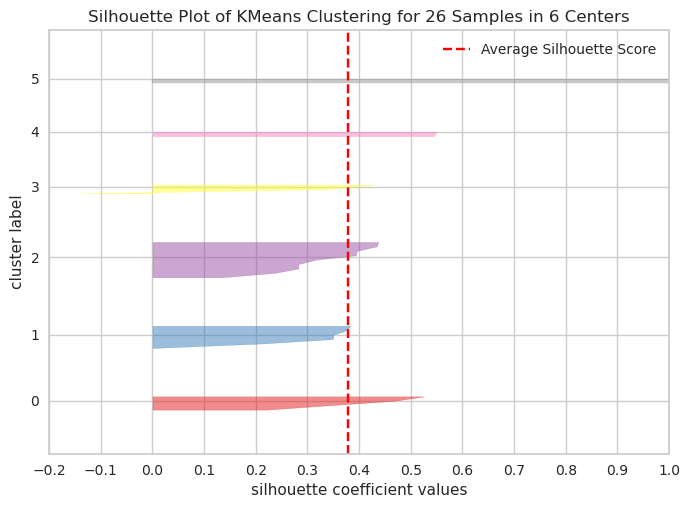

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 26 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_sub)
visualizer.show()

From the above plot, we can observe that cluster with label 3,4 and 5 has almost same number of observations (Width), so k=6 will not be an appropriate value. Let's visualize for k=5.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

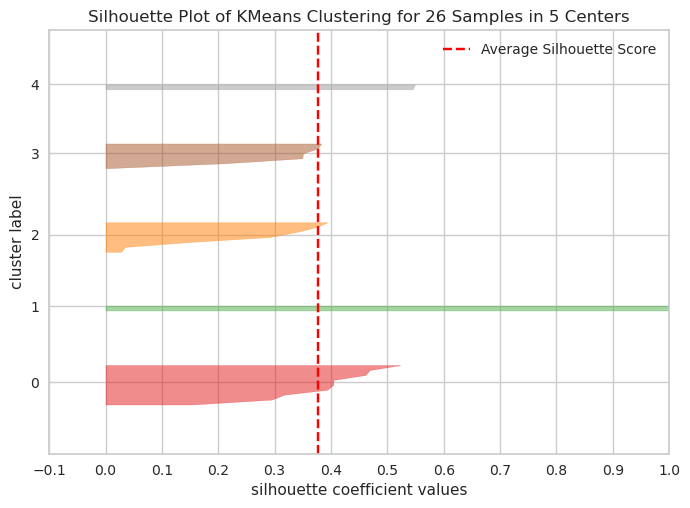

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 26 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_sub)
visualizer.show()

From the above plot, we can see that cluster with label 2 and 3 are having same width and silhoutte score,so k=5 will not be an appropriate value Let's visualize for k=4.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

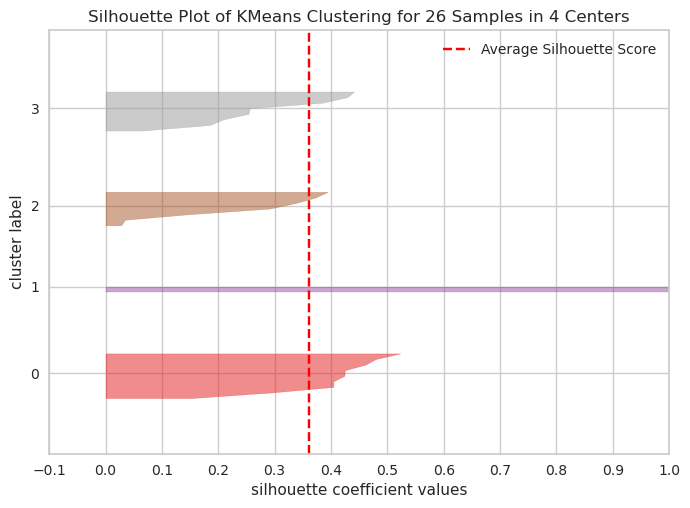

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 26 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_sub)
visualizer.show()

From the above plot, we can see that all the all the clusters have crossed Avg silhoutte score, all the clusters have different silhoutte score and have different width size, but the silhoutte score is very less. Let's visualize K=3.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

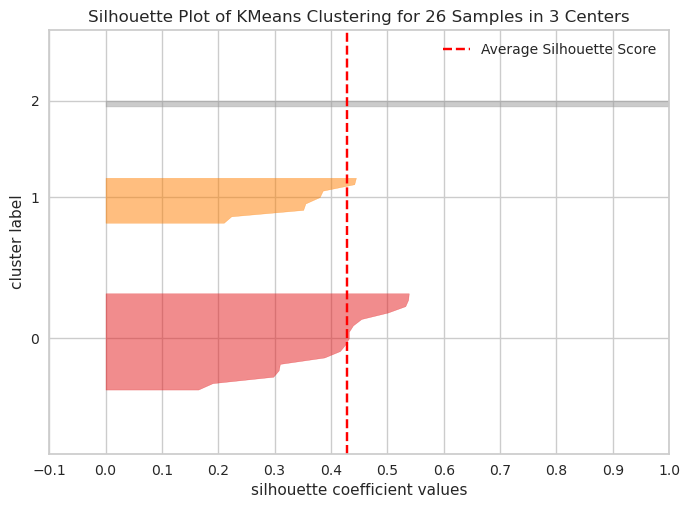

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 26 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_sub)
visualizer.show()

From the above plot, we can see that all the clusters have crossed Avg silhouette score, all the clusters have different silhouette scores and have different width sizes, but there is no elbow at K=3, so k=3 will not be an appropriate value. Let's visualize K=2 and decide.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

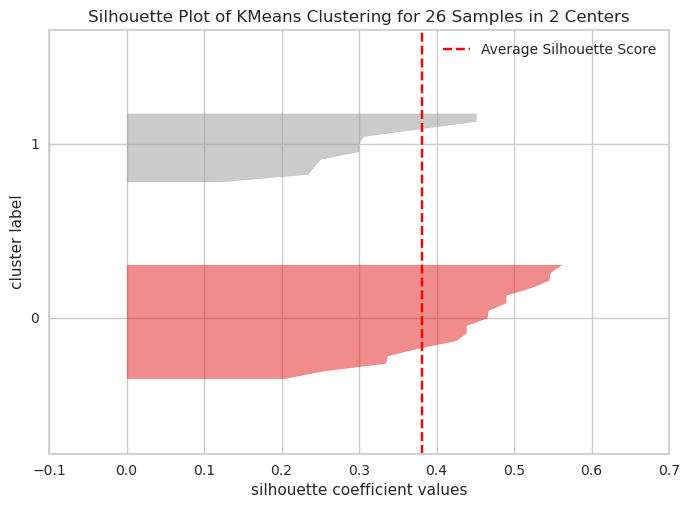

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 26 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df_sub)
visualizer.show()

We can see from the plot above that all the clusters meet the requirements. So, let's take 2 as the appropriate no. of clusters(K) as the silhouette score is high enough for all the 2-clusters(above average silhouette score), and there is a knick at 2 in the elbow curve.

Applying KMeans clustering for k=2

In [36]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_sub)


KMeans(n_clusters=2, random_state=1)

In [37]:
df['k_means_segments'] = kmeans.labels_

Cluster Profiling

In [38]:
cluster_profile = df.groupby('k_means_segments').mean()

In [39]:
cluster_profile['count_in_each_segment'] = (df.groupby("k_means_segments")['Fees'].count().values)

In [40]:
cluster_profile

,Teaching,Fees,Placements,Infrastructure,count_in_each_segment
k_means_segments,,,,,
0,3.375,4.125,3.875,3.875,16
1,1.900,2.700,1.300,2.600,10


In [41]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Teaching,Fees,Placements,Infrastructure,count_in_each_segment
k_means_segments,,,,,
0,3.375000,4.125000,3.875000,3.875000,16
1,1.900000,2.700000,1.300000,2.600000,10
